<a href="https://colab.research.google.com/github/amber717M/British_Airways_Data_Science_Virtual_Internship_Forage/blob/main/British_Airways_review_analysis_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries---> performing web-scraping-----> data-cleaning---->text-vectorization---->EDA AND topic_modelling

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Words fail to describe this...
1,✅ Trip Verified | Absolutely terrible experie...
2,✅ Trip Verified | BA overbook every flight to ...
3,✅ Trip Verified | \r\nThe flights were all on...
4,Not Verified | Only the second time flying BA ...


Next we should  clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df

,reviews
0,✅ Trip Verified | Words fail to describe this...
1,✅ Trip Verified | Absolutely terrible experie...
2,✅ Trip Verified | BA overbook every flight to ...
3,✅ Trip Verified | \r\nThe flights were all on...
4,Not Verified | Only the second time flying BA ...
...,...
995,✅ Trip Verified | Wonderful service on the fli...
996,✅ Trip Verified | London Heathrow to Mancheste...
997,✅ Trip Verified | London to Madrid. Lazy seat...
998,✅ Trip Verified | Luggage broken into – no ex...


In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
df

,reviews
0,Words fail to describe this last awful fligh...
1,Absolutely terrible experience. The app woul...
2,BA overbook every flight to maximise their in...
3,"\r\nThe flights were all on time, except Bel..."
4,Only the second time flying BA as first time ...
...,...
995,Wonderful service on the flight from Edinburg...
996,London Heathrow to Manchester. It was outrage...
997,London to Madrid. Lazy seat allocation has l...
998,Luggage broken into – no explanation. First ...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

**Step 1: Cleaning the text**

In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Words fail to describe this last awful fligh...,Words fail to describe this last awful flight...
1,Absolutely terrible experience. The app woul...,Absolutely terrible experience The app would ...
2,BA overbook every flight to maximise their in...,BA overbook every flight to maximise their in...
3,"\r\nThe flights were all on time, except Bel...",The flights were all on time except Belfast f...
4,Only the second time flying BA as first time ...,Only the second time flying BA as first time ...


**Step 2: Tokenization**

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).


**Step 3: Enrichment – POS tagging**

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

**Step 4: Stopwords removal**

Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

**Step 5: Obtaining the stem words**

A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Words fail to describe this last awful fligh...,Words fail to describe this last awful flight...,"[(Words, n), (fail, v), (describe, v), (last, ..."
1,Absolutely terrible experience. The app woul...,Absolutely terrible experience The app would ...,"[(Absolutely, r), (terrible, a), (experience, ..."
2,BA overbook every flight to maximise their in...,BA overbook every flight to maximise their in...,"[(BA, n), (overbook, None), (every, None), (fl..."
3,"\r\nThe flights were all on time, except Bel...",The flights were all on time except Belfast f...,"[(flights, n), (time, n), (except, None), (Bel..."
4,Only the second time flying BA as first time ...,Only the second time flying BA as first time ...,"[(second, a), (time, n), (flying, v), (BA, n),..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Words fail to describe this last awful fligh...,Words fail to describe this last awful flight...,"[(Words, n), (fail, v), (describe, v), (last, ...",Words fail describe last awful flight baby a...
1,Absolutely terrible experience. The app woul...,Absolutely terrible experience The app would ...,"[(Absolutely, r), (terrible, a), (experience, ...",Absolutely terrible experience app would let...
2,BA overbook every flight to maximise their in...,BA overbook every flight to maximise their in...,"[(BA, n), (overbook, None), (every, None), (fl...",BA overbook every flight maximise income reg...
3,"\r\nThe flights were all on time, except Bel...",The flights were all on time except Belfast f...,"[(flights, n), (time, n), (except, None), (Bel...",flight time except Belfast London never Staf...
4,Only the second time flying BA as first time ...,Only the second time flying BA as first time ...,"[(second, a), (time, n), (flying, v), (BA, n),...",second time fly BA first time positive Could...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Words fail to describe this last awful fligh...,Words fail describe last awful flight baby a...
1,Absolutely terrible experience. The app woul...,Absolutely terrible experience app would let...
2,BA overbook every flight to maximise their in...,BA overbook every flight maximise income reg...
3,"\r\nThe flights were all on time, except Bel...",flight time except Belfast London never Staf...
4,Only the second time flying BA as first time ...,second time fly BA first time positive Could...
...,...,...
995,Wonderful service on the flight from Edinburg...,Wonderful service flight Edinburgh Florence ...
996,London Heathrow to Manchester. It was outrage...,London Heathrow Manchester outrageous Britis...
997,London to Madrid. Lazy seat allocation has l...,London Madrid Lazy seat allocation lead husb...
998,Luggage broken into – no explanation. First ...,Luggage break explanation First good point C...


**Sentiment Analysis using VADER**

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Words fail to describe this last awful fligh...,Words fail to describe this last awful flight...,"[(Words, n), (fail, v), (describe, v), (last, ...",Words fail describe last awful flight baby a...,-0.9821,Negative
1,Absolutely terrible experience. The app woul...,Absolutely terrible experience The app would ...,"[(Absolutely, r), (terrible, a), (experience, ...",Absolutely terrible experience app would let...,-0.9245,Negative
2,BA overbook every flight to maximise their in...,BA overbook every flight to maximise their in...,"[(BA, n), (overbook, None), (every, None), (fl...",BA overbook every flight maximise income reg...,-0.4939,Negative
3,"\r\nThe flights were all on time, except Bel...",The flights were all on time except Belfast f...,"[(flights, n), (time, n), (except, None), (Bel...",flight time except Belfast London never Staf...,-0.8192,Negative
4,Only the second time flying BA as first time ...,Only the second time flying BA as first time ...,"[(second, a), (time, n), (flying, v), (BA, n),...",second time fly BA first time positive Could...,0.9349,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    520
Negative    375
Neutral     105
Name: Analysis, dtype: int64

**Visual Representation**

([<matplotlib.patches.Wedge at 0x7ffb686192a0>,
 [Text(-0.06906950569907239, 1.0978294054098232, 'Positive'),
  Text(-0.29026048211611194, -1.0610131255181166, 'Negative'),
  Text(1.2772151775079268, -0.43728868078581135, 'Neutral')],
 [Text(-0.03767427583585766, 0.5988160393144489, '52.0%'),
  Text(-0.15832389933606106, -0.5787344321007908, '37.5%'),
  Text(0.8041725191716577, -0.2753299101243997, '10.5%')])

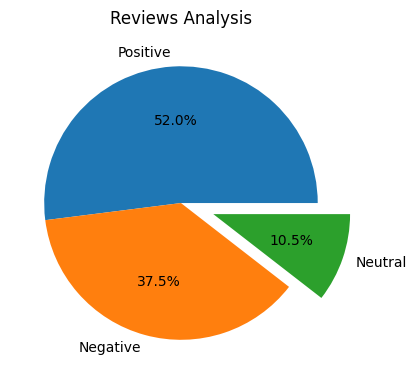

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

**Wordcloud**

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites


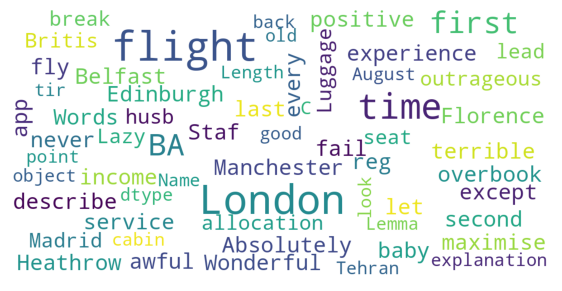

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(7, 7))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)